### 1. Import required libraries

In [4]:
# general lib
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# model and classify layer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import seaborn as sns

### 2. Read and description data

In [5]:
cardio = pd.read_csv('data/cardio_train.csv', sep=';')
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- Dataset information

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
cardio.shape

(70000, 13)

- Dataset statistics

In [10]:
cardio['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [11]:
cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### 3. Data description for this tasks

- Total of records: 70.000.

- Total of columns: 13 include 1 colunm is ID and 12 colunms is attribute.

- Attributes or input features or variable:
    - There are 3 types of input features:
    
        - Objective: factual information.

        - Examination: results of medical examination.

        - Subjective: information given by the patient.
    
- List of attributes:

    | Feature                               | Type                  | Column name | Data type                  |
    |---------------------------------------|-----------------------|-------------|----------------------------|
    | 1. Age                                | Objective Feature     | age         | int (in days)                 |
    | 2. Height                             | Objective Feature     | height      | int (cm)                   |
    | 3. Weight                             | Objective Feature     | weight      | float (kg)                 |
    | 4. Gender                             | Objective Feature     | gender      | categorical code: 1 - women, 2 - men           |
    | 5. Systolic blood pressure            | Examination Feature   | ap_hi       | int                        |
    | 6. Diastolic blood pressure           | Examination Feature   | ap_lo       | int                        |
    | 7. Cholesterol                        | Examination Feature   | cholesterol | int: 1 - normal, 2 - above normal, 3 - well above normal |
    | 8. Glucose                            | Examination Feature   | gluc        | int: 1 - normal, 2 - above normal, 3 - well above normal |
    | 9. Smoking                            | Subjective Feature    | smoke       | binary: whether patient smokes or not                     |
    | 10. Alcohol intake                    | Subjective Feature    | alco        | binary                     |
    | 11. Physical activity                 | Subjective Feature    | active      | binary                     |
    | 12. Presence or absence of cardiovascular disease | Target Variable | cardio      | binary                     |


#### Summary:


- Observation variable - input (X):

    1. Age: Continuous variable   

    2. Height: Continuous variable    

    3. Weight: Continuous variable       

    4. Gender: Discrete variable            

    5. Systolic blood pressure: Continuous variable        

    6. Diastolic blood pressure: Continuous variable  

    7. Cholesterol: Discrete variable      

    8. Glucose: Discrete variable          

    9. Smoking: Discrete variable        

    10. Alcohol intake: Continuous variable         
          
    11. Physical activity: Continuous variable



- Target variable - Category/ Classify variable - output (Y):

    - Column name: 'cardio'

    - Description: Presence or absence of Cardiovascular disease

    - Type: binary

    - Label distribution:
    
        - Total class 0: 35021
        
        - Total class 1: 34979

        - Insight: The class labels are balanced


### 4. Dataset distributions

In [12]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# cardio['age']

# age_in_days = cardio['age']
# age_in_years = age_in_days / 365.25
data_temp = cardio.copy()
data_temp['age'] = data_temp['age'] / 365.25

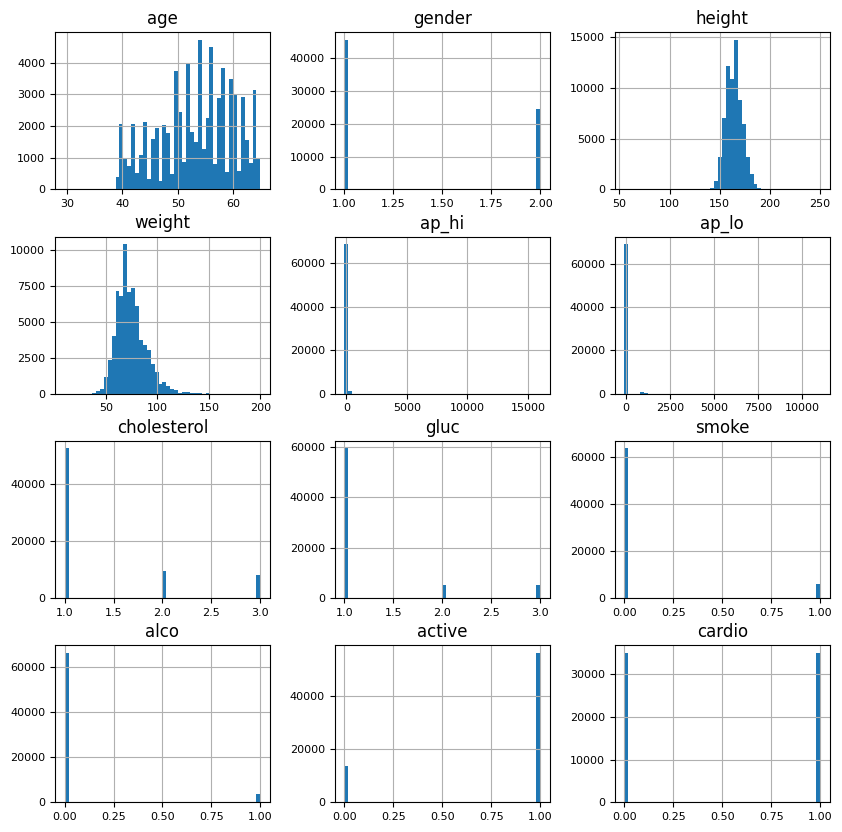

In [14]:
data_temp.iloc[:, 1:].hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [15]:
# cardio['age_by_year'] = cardio['age'] / 365.25
# cardio['age_by_year']

In [16]:
# # Plot a histogram of the 'Age' column
# plt.hist(cardio['age_by_year'])
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Age distribution')
# plt.show()

In [17]:
# # Plot a histogram of the 'Age' column
# plt.hist(cardio['age_by_year'])
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Age distribution')
# plt.show()

### 5. Implement with some algorithm's machine learning, build and training model

#### 5.1. Split the data to preapare for train, validation and test

In [18]:
X = cardio.iloc[:, 1:-1].values # get all record, for each record get all column exclude the first (id) and last (label) column => independent variable
y = cardio.iloc[:, -1].values # get all record, for each record only get the last column => dependent variable or the label need predict

In [19]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

- Explain: This code uses LabelEncoder from the Python sklearn.preprocessing library to convert string labels to numbers.

    - label_encoder = LabelEncoder() tạo một đối tượng LabelEncoder.

    - y = label_encoder.fit_transform(y) thực hiện hai bước:

        1. fit: Học cách ánh xạ từ nhãn sang số dựa trên dữ liệu y.
        
        2. transform: Chuyển đổi nhãn trong y thành dạng số dựa trên ánh xạ đã học.

=> Kết quả là một mảng numpy y mới, trong đó mỗi nhãn dạng chuỗi trong y ban đầu đã được chuyển đổi thành một số nguyên duy nhất.

- Điều này rất hữu ích khi làm việc với các thuật toán học máy, nhiều trong số chúng yêu cầu hoặc hoạt động tốt hơn với dữ liệu dạng số. Đặc biệt, LabelEncoder thường được sử dụng để chuyển đổi nhãn cho bài toán phân loại.

In [20]:
X.shape

(70000, 11)

In [21]:
y.shape

(70000,)

- ##### Split the dataset to the train_val and test set with ratio 80/20, then split the train_val to the train and val set with ratio 75/25

In [22]:
# split the dataset to the train and test set, prepare for training model
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42)


In [23]:
y_test.shape

(14000,)

In [24]:
# Count occurrences of each label
count_label_0 = np.sum(y_test == 0)
count_label_1 = np.sum(y_test == 1)

print("Test size:", y_test.shape)
print("Test label 0:", count_label_0)
print("Test label 1:", count_label_1)

Test size: (14000,)
Test label 0: 6969
Test label 1: 7031


- ##### Define the dictionary to store all results

In [25]:
# define the dictionary to store all results
results = {}
results_train = {}
results_val = {}

#### 5.2. Logistic Regresssion

In [26]:
%%time

train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values 
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

for C in Cs:
    logistic_model = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter = 10000, C = C, random_state = 42) # call model from lib
    logistic_model.fit(X_train, y_train) # fit the model with the dataset processed => training model
    
    y_train_pred = logistic_model.predict(X_train)
    y_val_pred = logistic_model.predict(X_val)
    y_test_pred = logistic_model.predict(X_test)
    
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    
    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)
    
    print('C: {:7} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(C, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))



best_C = Cs[np.argmax(val_f1)]

print(f'The best C (hyper-parameter) value, C = {best_C}')

training_start_time = time.time()

logistic_model = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter = 100000, C = best_C, random_state = 42)
logistic_model.fit(X_train, y_train)
    
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)
y_test_pred = logistic_model.predict(X_test)

training_end_time = time.time()
training_time_total = training_end_time - training_start_time
print(training_time_total)

results['Logistic Regression model'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]

results_train['Logistic Regression model'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Logistic Regression model'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

C:  0.0001 | train f1:  0.71 | val f1:   0.7 | test f1:   0.7


C:   0.001 | train f1:  0.71 | val f1:  0.71 | test f1:   0.7
C:    0.01 | train f1:  0.72 | val f1:  0.71 | test f1:  0.71
C:     0.1 | train f1:  0.72 | val f1:  0.71 | test f1:  0.71
C:       1 | train f1:  0.72 | val f1:  0.71 | test f1:  0.71
C:      10 | train f1:  0.72 | val f1:  0.72 | test f1:  0.71
C:   100.0 | train f1:  0.72 | val f1:  0.71 | test f1:  0.71
C:  1000.0 | train f1:  0.72 | val f1:  0.72 | test f1:  0.71
C: 10000.0 | train f1:  0.72 | val f1:  0.71 | test f1:  0.71
The best C (hyper-parameter) value, C = 1000.0
0.49491190910339355
CPU times: total: 1.48 s
Wall time: 5.22 s


##### The results information

In [27]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x0000023D2614C860>
accuracy:  71.05714285714285
precision:  71.2185673134951
recall:  71.05714285714285
f1_score:  71.01107591028133
training time total:  0.49491190910339355


##### Confusion matrix heatmap

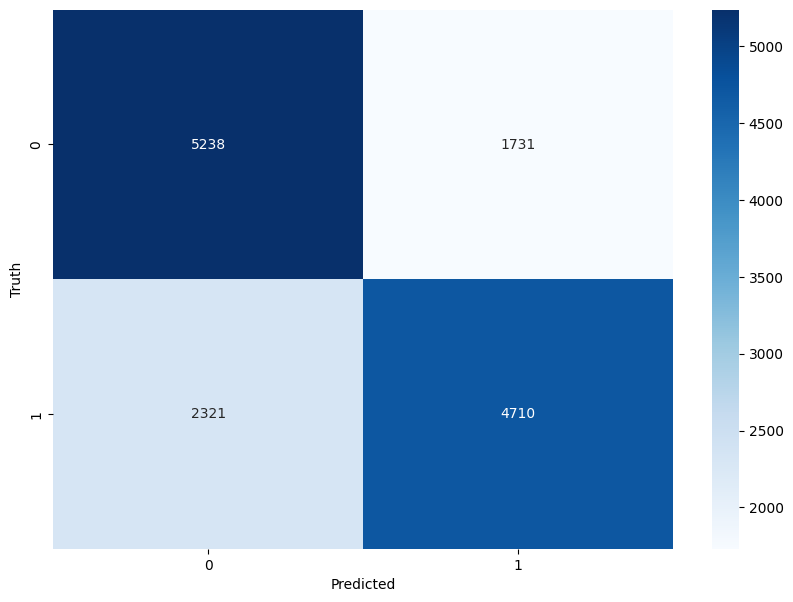

In [28]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

##### Visualize the accuracy, precision, recall, F1_score

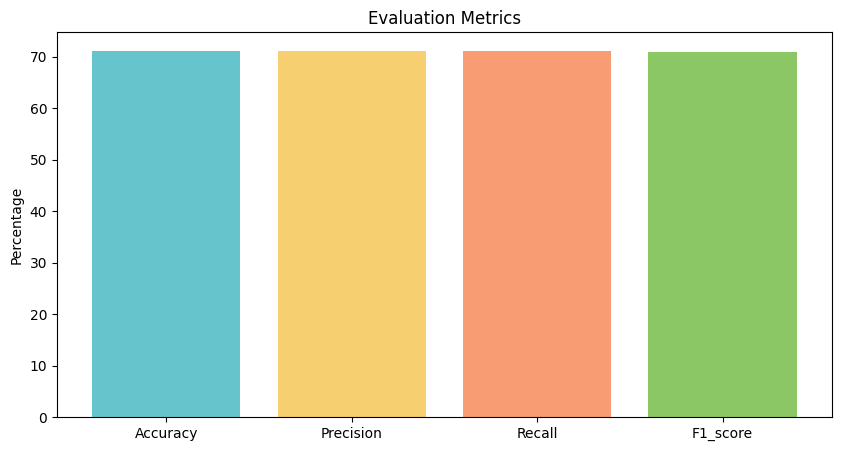

In [29]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [30]:
### 1. Logistic regresssion model
print("Completed")

Completed


#### 5.3. k Nearest Neighbors (k-NN)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# %%time
training_start_time = time.time()

knn_model = KNeighborsClassifier() # call model from lib
knn_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
# y_val_pred = knn_model.predict(X_val)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['k Nearest Neighbors (k-NN)'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

# results_val['k Nearest Neighbors (k-NN)'] = [
#     accuracy_score(y_val, y_val_pred),
#     precision_score(y_val, y_val_pred, average='weighted'),
#     recall_score(y_val, y_val_pred, average='weighted'),
#     f1_score(y_val, y_val_pred, average='weighted'),
#     training_time_total
# ]

##### The results information

In [32]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x0000023D2614C860>
accuracy:  68.1257142857143
precision:  68.1558038170353
recall:  68.1257142857143
f1_score:  68.1199172743177
training time total:  7.1053221225738525


##### Confusion matrix heatmap

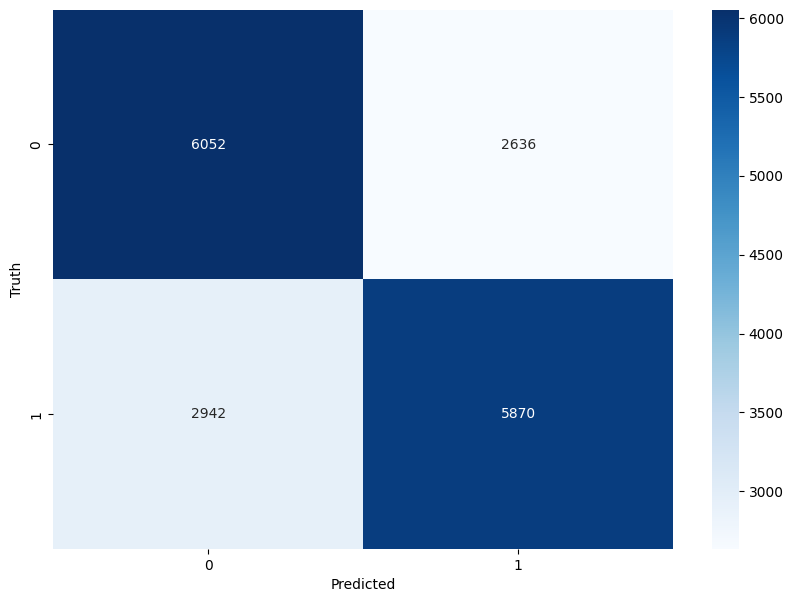

In [33]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

##### Visualize the accuracy, precision, recall, F1_score

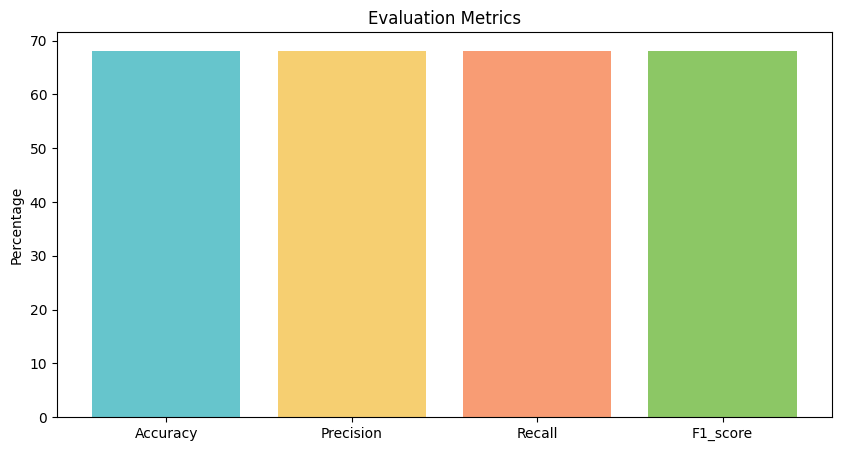

In [34]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [35]:
### 2. k Nearest Neighbors (k-NN)
print('Completed')

Completed


#### 5.4. Decision Tree

In [36]:
# split the dataset to the train and test set, prepare for training model
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42)


In [37]:
import sklearn.metrics as metrics
train_f1 = []
val_f1 = []
test_f1 = []

depths = [1, 2, 3, 5, 10, 15]



for depth in depths:

    dtree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    
    dtree.fit(X_train, y_train)
    
    y_train_pred = dtree.predict(X_train)
    y_val_pred = dtree.predict(X_val)
    y_test_pred = dtree.predict(X_test)
    
    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)
    
    print('max_depth: {:3} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(depth, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))
    
best_max_depth = depths[np.argmax(val_f1)]
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')



# %%time
training_start_time = time.time()


decision_tree_model = DecisionTreeClassifier(max_depth=best_max_depth) # call model from lib
decision_tree_model.fit(X_train, y_train) # fit the model with the dataset processed => training model

y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Desision Tree'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['Desision Tree'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Desision Tree'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

max_depth:   1 | train f1:  0.69 | val f1:  0.69 | test f1:  0.68
max_depth:   2 | train f1:  0.69 | val f1:  0.69 | test f1:  0.68
max_depth:   3 | train f1:  0.71 | val f1:  0.71 | test f1:  0.71


max_depth:   5 | train f1:  0.71 | val f1:   0.7 | test f1:   0.7
max_depth:  10 | train f1:  0.74 | val f1:   0.7 | test f1:   0.7
max_depth:  15 | train f1:   0.8 | val f1:  0.69 | test f1:  0.69
The best max_depth (hyper-parameter) value, max_depth = 3


##### The results information

In [38]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x0000023D2614C860>
accuracy:  71.97857142857143
precision:  72.23790913246191
recall:  71.97857142857143
f1_score:  71.90728346552687
training time total:  0.05164766311645508


##### Confusion matrix heatmap

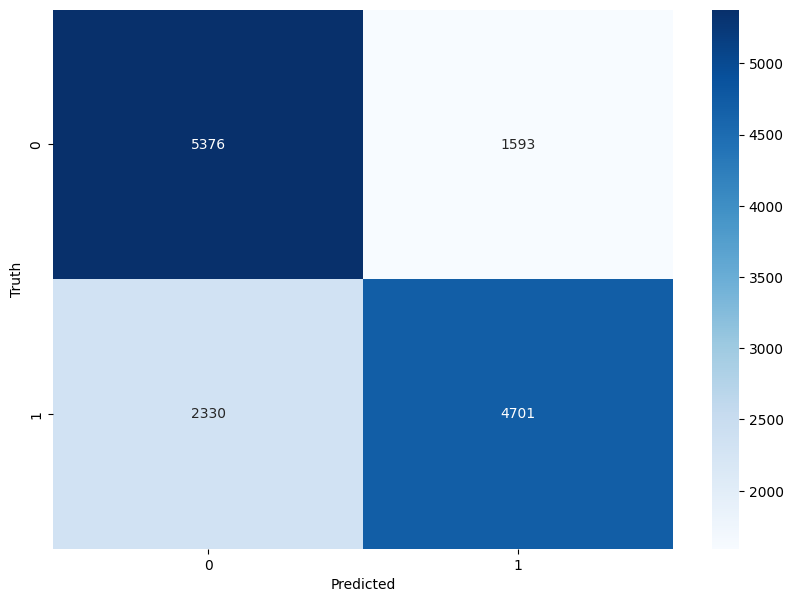

In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

##### Visualize the accuracy, precision, recall, F1_score

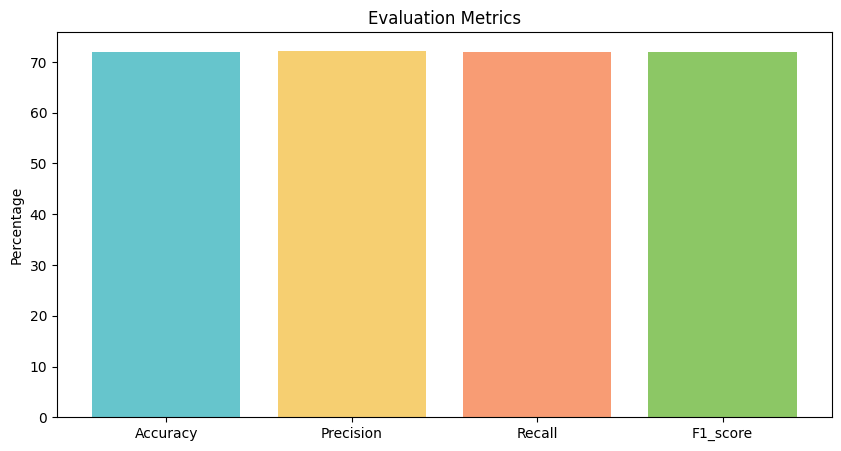

In [40]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [41]:
### 3. Decision Tree
print('Completed')

Completed


#### 5.5. Random forest

In [42]:
# %%time

train_f1 = []
val_f1 = []
test_f1 = []

depths = [1, 2, 3, 5, 10, 15, 20, 25]

for depth in depths:

    random_forest_model = RandomForestClassifier(max_depth = depth) # call model from lib
    
    random_forest_model.fit(X_train, y_train)
    
    y_train_pred = random_forest_model.predict(X_train)
    y_val_pred = random_forest_model.predict(X_val)
    y_test_pred = random_forest_model.predict(X_test)
    
    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)
    
    print('max_depth: {:3} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(depth, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))
    
best_max_depth = depths[np.argmax(val_f1)]
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

training_start_time = time.time()

random_forest_model = RandomForestClassifier(max_depth = best_max_depth) # call model from lib
    
random_forest_model.fit(X_train, y_train)
    
y_train_pred = random_forest_model.predict(X_train)
y_val_pred = random_forest_model.predict(X_val)
y_test_pred = random_forest_model.predict(X_test)


training_end_time = time.time()

training_time_total = training_end_time - training_start_time

results['Random forest'] = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='weighted'),
    recall_score(y_test, y_test_pred, average='weighted'),
    f1_score(y_test, y_test_pred, average='weighted'),
    training_time_total
]


results_train['Random forest'] = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='weighted'),
    recall_score(y_train, y_train_pred, average='weighted'),
    f1_score(y_train, y_train_pred, average='weighted'),
    training_time_total
]

results_val['Random forest'] = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred, average='weighted'),
    recall_score(y_val, y_val_pred, average='weighted'),
    f1_score(y_val, y_val_pred, average='weighted'),
    training_time_total
]

max_depth:   1 | train f1:  0.69 | val f1:  0.69 | test f1:  0.68
max_depth:   2 | train f1:   0.7 | val f1:   0.7 | test f1:  0.69
max_depth:   3 | train f1:  0.71 | val f1:  0.71 | test f1:   0.7
max_depth:   5 | train f1:  0.71 | val f1:  0.71 | test f1:  0.71
max_depth:  10 | train f1:  0.75 | val f1:  0.72 | test f1:  0.72
max_depth:  15 | train f1:  0.82 | val f1:  0.72 | test f1:  0.72
max_depth:  20 | train f1:   0.9 | val f1:  0.72 | test f1:  0.72
max_depth:  25 | train f1:  0.96 | val f1:  0.72 | test f1:  0.71
The best max_depth (hyper-parameter) value, max_depth = 15


##### The results information

In [43]:
accuracy_percentage = accuracy_score(y_test, y_test_pred) * 100
precision_percentage = precision_score(y_test, y_test_pred, average='weighted') * 100
recall_percentage = recall_score(y_test, y_test_pred, average='weighted') * 100
f1_score_percentage = f1_score(y_test, y_test_pred, average='weighted') * 100

print('accuracy: ', accuracy_score)
print('accuracy: ', accuracy_percentage)
print('precision: ', precision_percentage)
print('recall: ', recall_percentage)
print('f1_score: ', f1_score_percentage)
print('training time total: ', training_time_total)

accuracy:  <function accuracy_score at 0x0000023D2614C860>
accuracy:  73.12142857142857
precision:  73.33158544667866
recall:  73.12142857142857
f1_score:  73.06943265717034
training time total:  5.176159381866455


##### Confusion matrix heatmap

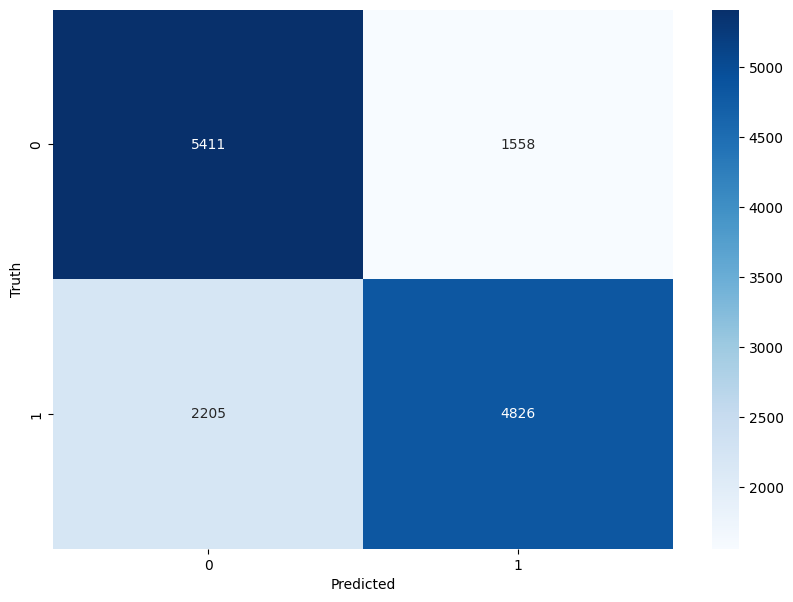

In [44]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

##### Visualize the accuracy, precision, recall, F1_score

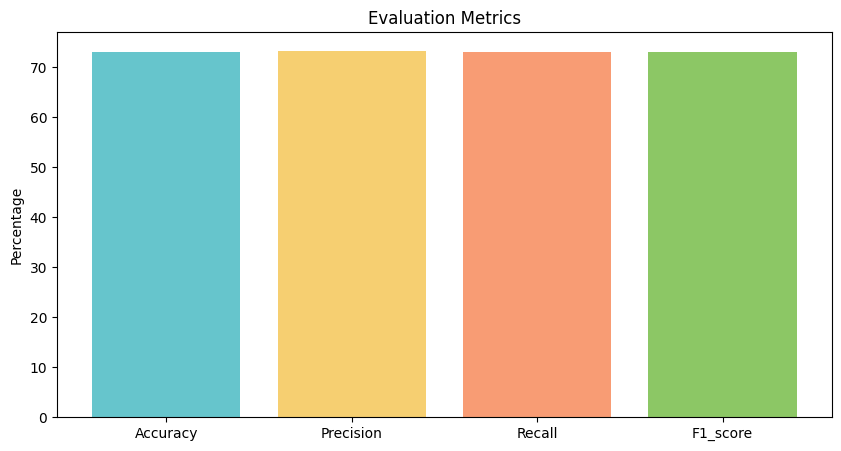

In [45]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred) * 100
precision = precision_score(y_test, y_test_pred, average='weighted') * 100
recall = recall_score(y_test, y_test_pred, average='weighted') * 100
f1 = f1_score(y_test, y_test_pred, average='weighted') * 100

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3'])
plt.ylabel('Percentage')
plt.title('Evaluation Metrics')

# colors=['#66c5cc', '#f6cf71', '#f89c74', '#8cc765', '#9eb9f3']

plt.show()

In [46]:
### 4. Random forest
print('Completed')

Completed


#### 5.6. K-Means

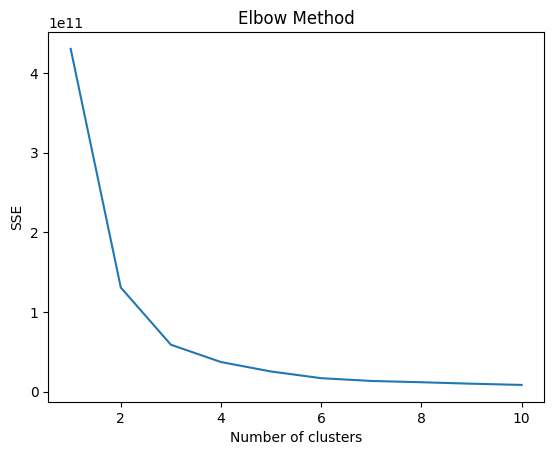

In [50]:
from sklearn.cluster import KMeans 

#sử dụng elbow method để xác định k 

sse = []
k_range = range (1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit_transform(X)
    sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


lấy k = 3 

### 6. The results information and compare

#### Compare results

In [47]:
dataframe_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.710571,0.712186,0.710571,0.710111,0.494912
k Nearest Neighbors (k-NN),0.681257,0.681558,0.681257,0.681199,7.105322
Desision Tree,0.719786,0.722379,0.719786,0.719073,0.051648
Random forest,0.731214,0.733316,0.731214,0.730694,5.176159


In [48]:
dataframe_results_train = pd.DataFrame.from_dict(results_train, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results_train

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.717238,0.718925,0.717238,0.716704,0.494912
k Nearest Neighbors (k-NN),0.777695,0.778045,0.777695,0.777607,7.105322
Desision Tree,0.728048,0.730703,0.728048,0.727276,0.051648
Random forest,0.825810,0.829336,0.825810,0.825348,5.176159


In [49]:
dataframe_results_val = pd.DataFrame.from_dict(results_val, orient='index', columns=[
    'Accuracy',
    'Precision',
    'Recall',
    'F1_score',
    'Training time total'
])

dataframe_results_val

,Accuracy,Precision,Recall,F1_score,Training time total
Logistic Regression model,0.716286,0.716872,0.716286,0.715969,0.494912
Desision Tree,0.704071,0.704391,0.704071,0.703847,0.051648
Random forest,0.732429,0.733342,0.732429,0.732035,5.176159
